This is the exact solution of the adviction equation in 1D with 1 wave going from left to right at a constant speed.

In [58]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from IPython.display import display, clear_output # this is for plotting animations
import sys
init_printing()

The equation we are trying to model is the advection equation:

$$q_x + \hat{u}q_t = 0$$

making of the initial data

Text(0.5, 1.0, 'Initial Conditions')

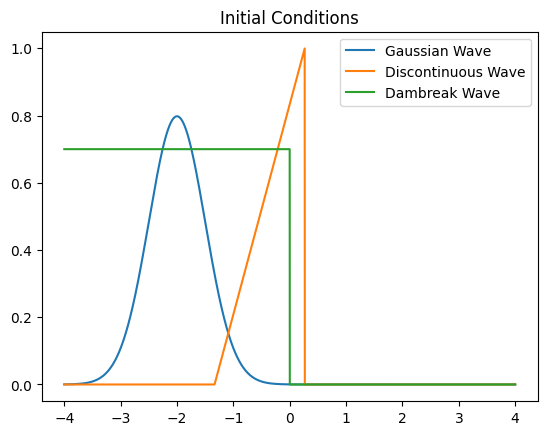

In [94]:
# we have x on an interval [0,2], t = [0,1] and we timestep each in 1001 steps, which gives us 1000 intervals
length_of_domain = 8
number_of_intervals = 10000
timesteps = 101
higher_dam_break_v = 0.7
x = np.linspace(-4,4,number_of_intervals+1)
# defining initial for a discontinuous wave
initial_dis_wave = np.zeros(number_of_intervals+1) 
for i in range(0,number_of_intervals//5):
    initial_dis_wave[int(number_of_intervals/3)+i] = i*(5/number_of_intervals)
# defining initial for a gaussian wave 
sigma = 1/2
mu = -2
initial_gaus_wave = np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# defining initial for a dambreak wave 
initial_dam_break = np.zeros(number_of_intervals+1)
for i in range(0,int(number_of_intervals//2)):
    initial_dam_break[i] = higher_dam_break_v    

#defining time interval and speed (u hat)
t_array = np.linspace(0,2,timesteps)
wave_speed = 1.5 # this is u hat

#plot initial waves
plt.plot(x,initial_gaus_wave, label = 'Gaussian Wave')
plt.plot(x,initial_dis_wave, label = 'Discontinuous Wave')
plt.plot(x,initial_dam_break, label = 'Dambreak Wave')
plt.legend()
plt.title('Initial Conditions')

propergation of each wave with:

$$q(x,t) = \mathring{q}(x-\hat{u}t)$$

In [95]:
def calculate_exact_state_1wave(initial_values, x, t, u, min_interval_value, step_size, dam_break):
    # defining the exact solution for a single wave
    temp = x - u*t
    if temp < min_interval_value:
        if dam_break == True:
            return higher_dam_break_v 
        else:
            return 0  # setting 0 inflow on the left boundary
    elif temp < 0:
        # distance from the left boundary, calculated by negative boundery condition - negative value. 
        distance_from_left_boundary = abs(min_interval_value-temp)
        index = int(distance_from_left_boundary/step_size)
        return initial_values[index]
    else:
        index = int((abs(min_interval_value) + temp)/step_size)
        return initial_values[index]

Plotting an animation with respect to time for each of the three wave types

In [100]:
# write 0 below for discontinuous wave, 1 for gaussian wave and 2 for dambreak wave
current_wave = 0 
waves = [initial_dis_wave, initial_gaus_wave, initial_dam_break]

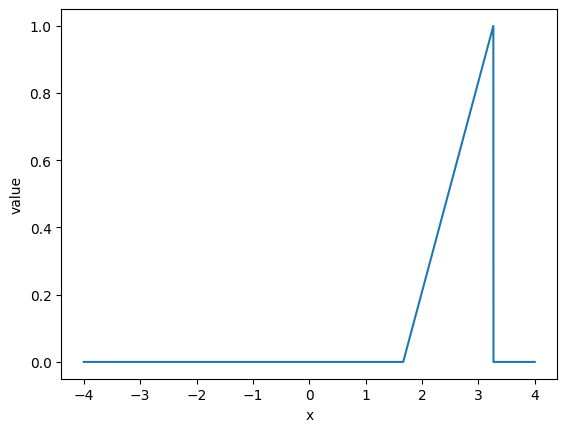

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for t in t_array:
    ax.cla()
    data = np.zeros(number_of_intervals+1)
    for i in range(0,len(x)):
        data[i] = calculate_exact_state_1wave(waves[current_wave], x[i], t, wave_speed, -4, 8/number_of_intervals, current_wave == 2)
    ax.plot(x,data)
    ax.set_xlabel('x')
    ax.set_ylabel('value')
    display(fig)
    clear_output(wait=True)
    plt.pause(0.01)


Lets try and solve the same problem with a numerical solution using the FVM.
$$ Q_i^{n+1}=Q_i^n-\frac{\Delta t}{\Delta x}(F_{i+\frac{1}{2}}^n-F_{i-\frac{1}{2}}^n)$$

We start by setting the grid into 1000 intervals.

In [102]:
# global variables for the FVM scheme 
# interval has to be a multiple of interval_q 
interval_q = 1000
delta_t = 0.0001

In [ ]:
Q = []
for i in range(0,interval_q):
    

    average_value = 
    Q.append(0.5*waves[current_wave][i]**2)